In [1]:
from MHW_daily_calcs import *
import matplotlib.pyplot as plt
import cmocean
import itertools
import matplotlib as mpl
font = {
        'size'   : 12}
mpl.rc('font', **font)

In [2]:
climyrs=[1993,2023]
qtile=0.90
detr=True
smoothClim=True
smoothTrend=True
meth=method
win=halfwin
qtvar='qt1'
delt=15
region='global'
leadlist=[0, 1, 3, 6, 10, 15, 20, 30]
ips=np.arange(0,21)

In [12]:
rr={}
for ind in range(0,len(leadlist)):
    rr[leadlist[ind]]=np.load(fnameReli(leadlist[ind],climyrs, smoothClim, meth, win, detr, qtile, delt,qtvar,region))

In [17]:
rr[0]

NpzFile '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily/stats/Reli_OISST_CanESM_daily_L000_C1993_2023_ClimStri10_detr_0_90_delt15__qt1_global.npz' with keys: mcount, ocount

In [19]:
cols={0:'red',3:'darkorange',6:'darkcyan',10:'purple'}

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


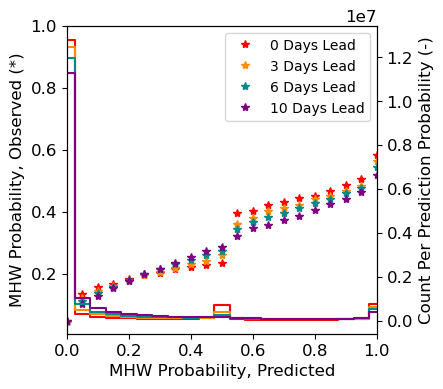

In [21]:
fig,ax=plt.subplots(1,1,figsize=(4,4))
axb=ax.twinx()
for il in (0,3,6,10):
    ax.plot(ips/20,rr[il]['ocount']/rr[il]['mcount'],'*',color=cols[il],label=f"{il} Days Lead")
    ax.set_aspect(1)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1.008)
    ax.set_xticks([0,.2,.4,.6,.8,1])
    ax.set_yticks([.2,.4,.6,.8,1.])
    axb.step(ips/20,rr[il]['mcount'],cols[il],where='mid')
    #axb.set_yscale('log')
ax.legend(fontsize=10)
ax.set_xlabel('MHW Probability, Predicted')
ax.set_ylabel('MHW Probability, Observed (*)')
axb.set_ylabel('Count Per Prediction Probability (-)')

fig.savefig('Reldaily.png',dpi=600,bbox_inches='tight')

(array([21477103.,   291658.,   166818.,   122647.,   100929.,    88926.,
           83421.,    81291.,    86255.,   105331.,   688387.,    62027.,
           45994.,    40464.,    37573.,    36647.,    37974.,    41829.,
           50242.,   848884.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 20 artists>)

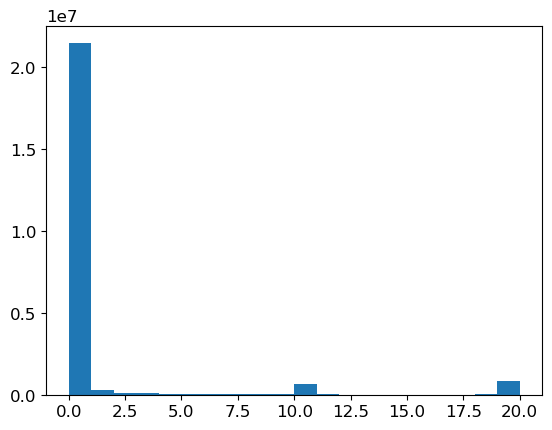

In [7]:
ilead=0
fMHWM=xr.open_mfdataset([fnameCanESMMHW(workdir, climyrs[0], climyrs[-1], ilead, jj,
                                        qt=qtile,detrend=detr,smoothClim=True, smoothTrend=True,
                                        meth=meth,win=win,delt=delt,qtvar=qtvar) for jj in (0,60,120)],
                        combine='nested',concat_dim='lat',parallel=True,decode_times=False,chunks={'time':10,'lat':60,'lon':360})
MHWp=(fMHWM.isMHW.sum(dim='r')).values.flatten()
plt.hist(MHWp,bins=20)

In [30]:
ocount

array([162873.])

In [31]:
mcount

array([687382.])

In [35]:
print(f'10:m{msum},o{osum}')

10:m687382,o162873.0
